#How to deal with PCA

In [57]:
print(__doc__)

# Authors: Gael Varoquaux
#          Jaques Grobler
#          Kevin Hughes
# License: BSD 3 clause

from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Automatically created module for IPython interactive environment


# Create the data

In [44]:


e = np.exp(1)
np.random.seed(4)


def pdf(x):
    return 0.5 * (stats.norm(scale=0.25 / e).pdf(x)
                  + stats.norm(scale=4 / e).pdf(x))
#base variables
y = np.random.normal(scale=0.5, size=(30000))
x = np.random.normal(scale=0.5, size=(30000))
z = np.random.normal(scale=0.1, size=len(x))

density = pdf(x) * pdf(y)
pdf_z = pdf(5 * z)

density *= pdf_z


In [47]:
#add some more variables
a = x + y
b = 2 * y
c = a - b + z

norm = np.sqrt(a.var() + b.var())
a /= norm
b /= norm

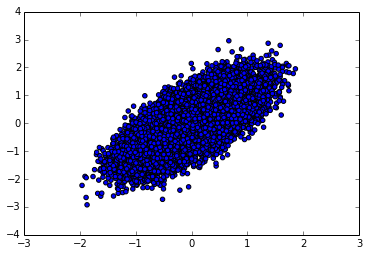

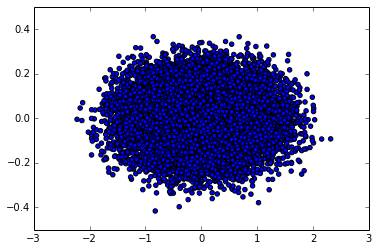

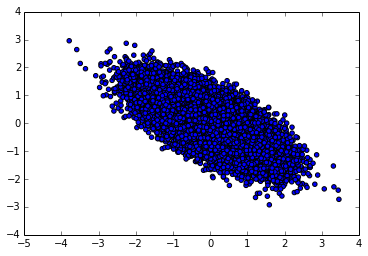

In [50]:
plt.scatter(x,c)
plt.show()
plt.scatter(a,z)
plt.show()
plt.scatter(b,c)
plt.show()

#Train some PCA

In [54]:
Y = np.c_[x,y,z,a, b, c]


pca = PCA(n_components=3)
pca.fit(Y)


PCA(copy=True, n_components=3, whiten=False)

In [55]:
pca_score = pca.explained_variance_ratio_
print pca_score


[ 0.66412254  0.32862884  0.00724862]


In [56]:
V = pca.components_
print V

[[-0.05350907  0.4261072  -0.00314116  0.30574375  0.69930364 -0.48275743]
 [ 0.60879282  0.07686677  0.00745987  0.56263335  0.12614951  0.53938591]
 [ 0.29654741 -0.13633693 -0.82159964  0.13146431 -0.22374865 -0.3887153 ]]


#Fancy PCA plots

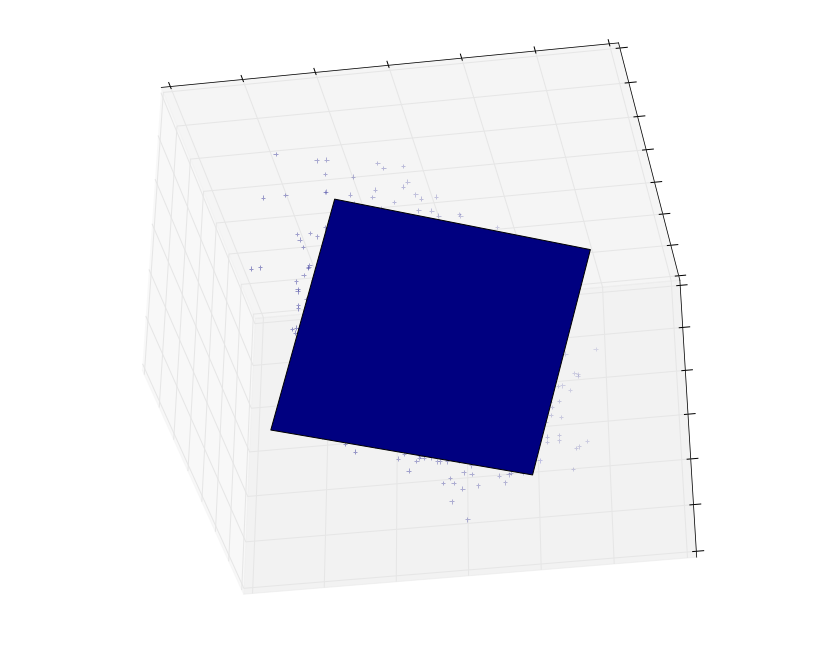

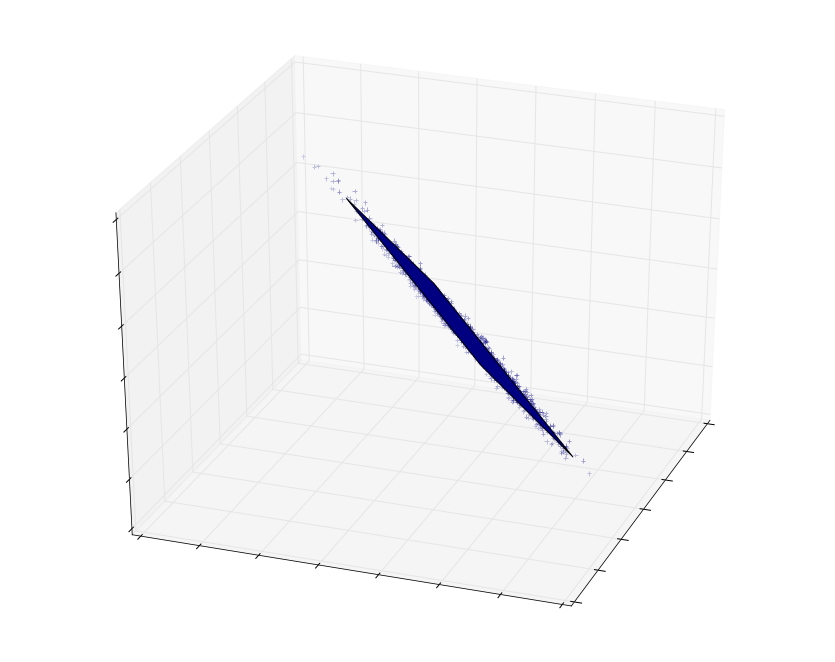

In [52]:
###############################################################################
# Plot the figures
def plot_figs(fig_num, elev, azim):
    fig = plt.figure(fig_num, figsize=(12, 9))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=elev, azim=azim)

    ax.scatter(a[::10], b[::10], c[::10], c=density[::10], marker='+', alpha=.4)
    
    x_pca_axis, y_pca_axis, z_pca_axis = V.T * pca_score / pca_score.min()

    x_pca_axis, y_pca_axis, z_pca_axis = 3 * V.T
    x_pca_plane = np.r_[x_pca_axis[:2], - x_pca_axis[1::-1]]
    y_pca_plane = np.r_[y_pca_axis[:2], - y_pca_axis[1::-1]]
    z_pca_plane = np.r_[z_pca_axis[:2], - z_pca_axis[1::-1]]
    x_pca_plane.shape = (2, 2)
    y_pca_plane.shape = (2, 2)
    z_pca_plane.shape = (2, 2)
    ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])


elev = -40
azim = -80
plot_figs(1, elev, azim)

elev = 30
azim = 20
plot_figs(2, elev, azim)

plt.show()